In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [26]:
import warnings
warnings.filterwarnings("ignore")


In [27]:
df_store = pd.read_csv('stores.csv') #store data
df_features = pd.read_csv('features.csv') #store data
df_train = pd.read_csv('train.csv') #store data

In [28]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')

In [29]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [30]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) 

In [31]:
df = df.loc[df['Weekly_Sales'] > 0]

In [32]:
df = df.fillna(0)

In [33]:
nan_counts = df.isna().sum()
print(nan_counts)

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


In [34]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [35]:
df_encoded = df.copy()

### Doing encoding, sorting the values by Date

In [36]:
type_group = {'A':1, 'B': 2, 'C': 3}  
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [37]:
df_encoded = df_encoded.sort_values(by='Date', ascending=True)

### Mapping the holidays and Month, Year and Week Number columns

In [38]:
import pandas as pd

# Convert Date to datetime
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'])

# Extract date-based features
df_encoded['Month'] = df_encoded['Date'].dt.month           # Numeric month (1-12)
df_encoded['Year'] = df_encoded['Date'].dt.year             # Four-digit year
df_encoded['Week'] = df_encoded['Date'].dt.isocalendar().week  # ISO week number

# Define holiday mapping and encoding
holiday_map = {
    '2010-02-12': 'Super Bowl',  '2011-02-11': 'Super Bowl',  '2012-02-10': 'Super Bowl',
    '2010-09-10': 'Labor Day',   '2011-09-09': 'Labor Day',   '2012-09-07': 'Labor Day',
    '2010-11-26': 'Thanksgiving','2011-11-25': 'Thanksgiving',
    '2010-12-31': 'Christmas',   '2011-12-30': 'Christmas'
}
holiday_encoding = {'Super Bowl': 1, 'Thanksgiving': 2, 'Christmas': 3, 'Labor Day': 4}

# Encode IsHoliday directly
df_encoded['IsHoliday'] = (
    df_encoded['Date'].dt.strftime('%Y-%m-%d')
    .map(holiday_map)
    .map(holiday_encoding)
    .fillna(0)
    .astype(int)
)


print(df_encoded.head())


        Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50          0        42.31   
140804     15    21 2010-02-05       3253.19          0        19.83   
140661     15    20 2010-02-05       4606.90          0        19.83   
140518     15    19 2010-02-05       1381.40          0        19.83   
140408     15    18 2010-02-05       2239.25          0        19.83   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        0.0        0.0        0.0        0.0        0.0   
140804       2.954        0.0        0.0        0.0        0.0        0.0   
140661       2.954        0.0        0.0        0.0        0.0        0.0   
140518       2.954        0.0        0.0        0.0        0.0        0.0   
140408       2.954        0.0        0.0        0.0        0.0        0.0   

               CPI  Unemployment  Type    Size  Month  Year  Week  
0       211.096358         8.106    

In [39]:
df_encoded.drop(columns=['Date'], inplace=True)

In [40]:
df_new = df_encoded.copy()

In [41]:
df_new['IsHoliday'].value_counts()

IsHoliday
0    390652
1      8873
4      8832
2      5946
3      5909
Name: count, dtype: int64

### Building correlation matrix

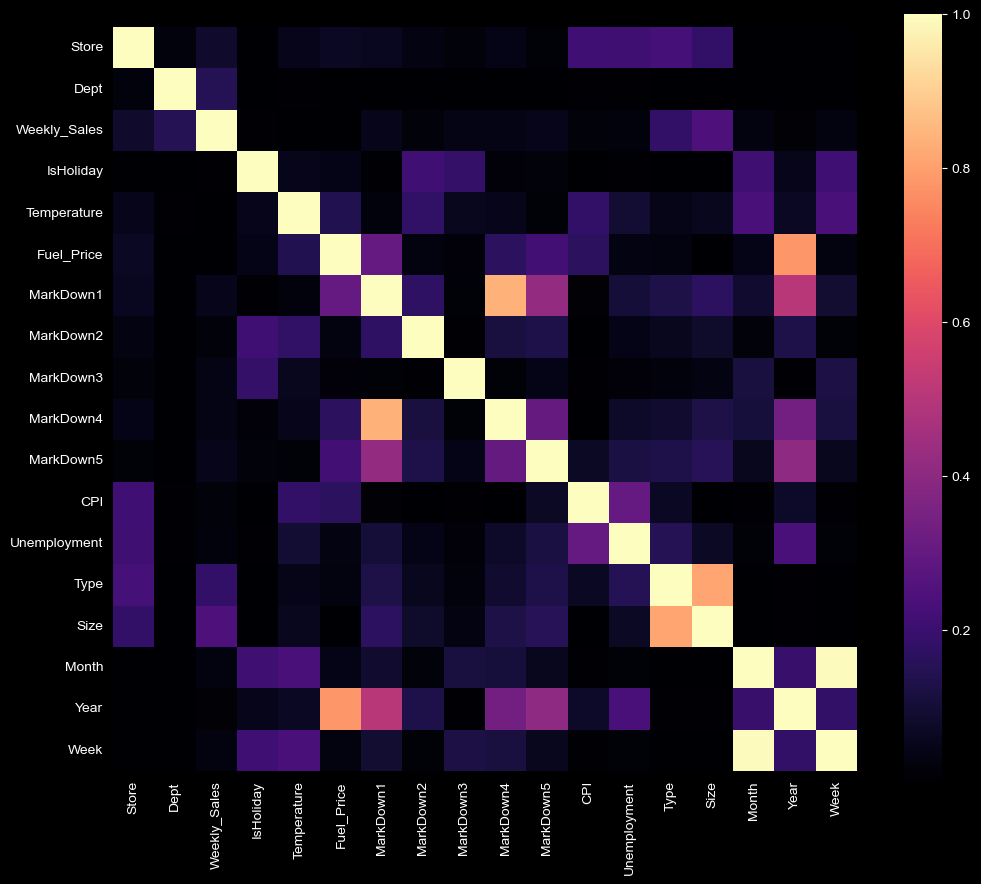

In [42]:
# Select only numeric columns for correlation
df_numeric = df_new.select_dtypes(include=['number'])

plt.style.use("dark_background")
plt.figure(figsize=(12,10))

sns.heatmap(
    df_numeric.corr().abs(),  # correlation of numeric columns only
    cmap="magma",             # dark purple to pink/orange/white
    square=True
)

plt.show()


### Size, Type, Department and Store have a correlation with a Weekly sales. 

### Lets try and build Gradient boosting model and custom weighted mean absolute error score

In [43]:
train_data = df_new[:int(0.7*(len(df_new)))] # taking train part
test_data = df_new[int(0.7*(len(df_new))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [44]:
def wmae(y_true, y_pred, sample_weight=None):
    if sample_weight is None:
        sample_weight = np.ones(len(y_true))
    return np.sum(sample_weight * np.abs(y_true - y_pred)) / np.sum(sample_weight)

train_weights = np.where(X_train['IsHoliday'], 5, 1)
test_weights = np.where(X_test['IsHoliday'], 5, 1)


In [45]:
# Fit a Gradient Boosting model ---
model = GradientBoostingRegressor(n_estimators=50, random_state=42, max_depth=35, max_features = 'sqrt',min_samples_split = 10)
model.fit(X_train, y_train, sample_weight=train_weights)

#  Predict on the test set and evaluate WMAE ---
preds = model.predict(X_test)
test_wmae = wmae(y_test.values, preds, sample_weight=test_weights)
print("Test WMAE:", test_wmae)

Test WMAE: 3813.631232410457


### Score showed 3813 which is roughly equal to a 23% error according to our values

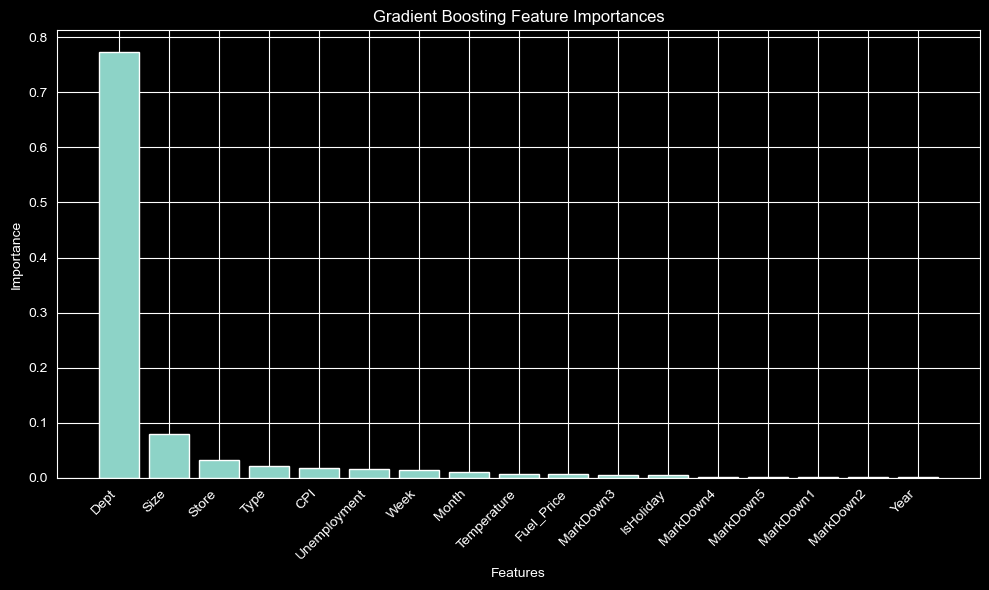

In [46]:
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_features = np.array(used_cols)[indices]
sorted_importances = importances[indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Gradient Boosting Feature Importances')
plt.tight_layout()
plt.show()


### Feature importance histogram shows that Dept has a very high importance, the model heavily relies on the information captured by this feature.


### Lets build a feature importance model 

In [47]:

# Extract feature importances
feature_importance_pairs = list(zip(used_cols, importances))

# Sort by importance descending
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Print (or visualize) them to see which are most important
print("Feature Importances (Descending):")
for feature, imp in feature_importance_pairs:
    print(f"{feature}: {imp:.4f}")
    
# Select top features
threshold = 0.02  
selected_features = [feat for feat, imp in feature_importance_pairs if imp > threshold]

print("\nSelected Features:", selected_features)

# Retrain model using only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_refined = GradientBoostingRegressor( n_estimators=150, random_state=42, max_depth=64, max_features='sqrt',min_samples_split=10)
model_refined.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_test_refined = model_refined.predict(X_test_selected)
test_wmae_refined = wmae(y_test.values, y_pred_test_refined, sample_weight=test_weights)
print("Test WMAE (Refined Model):", test_wmae_refined)


Feature Importances (Descending):
Dept: 0.7736
Size: 0.0804
Store: 0.0333
Type: 0.0225
CPI: 0.0181
Unemployment: 0.0163
Week: 0.0137
Month: 0.0108
Temperature: 0.0077
Fuel_Price: 0.0065
MarkDown3: 0.0049
IsHoliday: 0.0047
MarkDown4: 0.0018
MarkDown5: 0.0017
MarkDown1: 0.0016
MarkDown2: 0.0015
Year: 0.0011

Selected Features: ['Dept', 'Size', 'Store', 'Type']
Test WMAE (Refined Model): 2711.522588399504


### The threshold and the hyperparameters are not random, after several experiments this is the values that worked the best in my case. 
### The best result I could achieve was a value of 2711 WMAE with 3 selected top features which is equal to 16-17% error
### This is not optimal result so I will try exponential smoothing model in my other notebook. 